<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/NEW_DTW_EXPERIMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd


In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col="time HHMMSS")

<Axes: xlabel='time HHMMSS'>

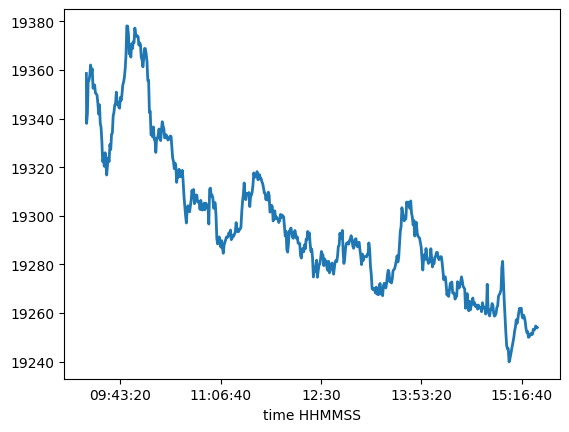

In [39]:
data['Price of Synthetic option derived future'].plot(x_compat=True,linewidth=2)

In [40]:
pip install dtw


In [42]:
import  matplotlib.pyplot as plt


In [43]:
pip install dtaidistance


(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

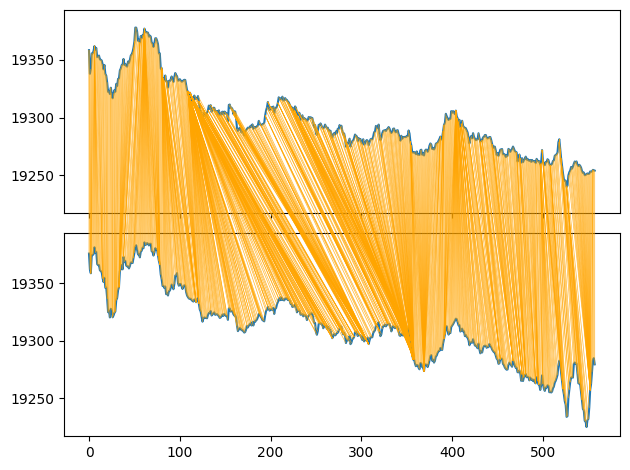

In [44]:
# DTW distance and warping path for Price of synthetic option And Spot Price.
df1=data[['Price of Synthetic option derived future']]
df2=data[['Spot price ltp NIFTY50']]
a=df1['Price of Synthetic option derived future'].values
b=df2['Spot price ltp NIFTY50'].values
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
path = dtw.warping_path(a, b)
dtwvis.plot_warping(a, b, path)


In [45]:
d = dtw.distance_fast(a, b, use_pruning=True)
print(d)


147.74701758649886


<Axes: xlabel='time HHMMSS'>

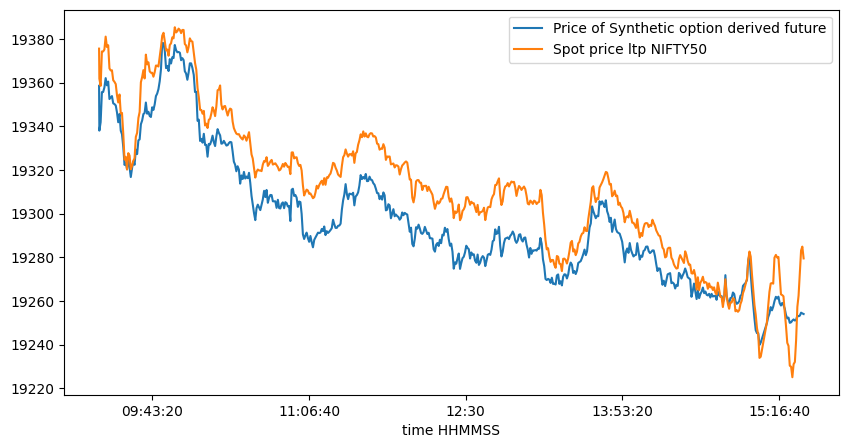

In [46]:
#Graph of synthetic Price and Spot Price.
data.loc[:,['Price of Synthetic option derived future','Spot price ltp NIFTY50']].plot( mark_right=False, figsize = (10,5), grid=False)


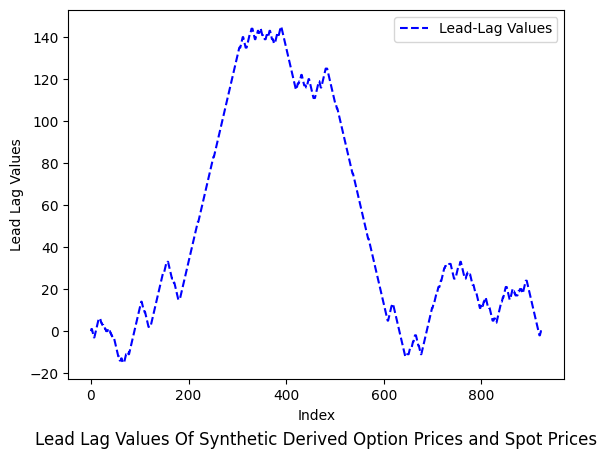

In [54]:
#Lead Lag Values of Synthetic Price And Spot Price
import numpy as np
lead_lag_values2 = np.array([(point[1] - point[0]) for point in path])
plt.plot(lead_lag_values2, linestyle='dashed', color='blue', label='Lead-Lag Values')
plt.title("Lead Lag Values Of Synthetic Derived Option Prices and Spot Prices",y=-0.2)
plt.xlabel("Index")
plt.ylabel("Lead Lag Values")
plt.legend(loc='upper right')
plt.show()


145.7335668265941


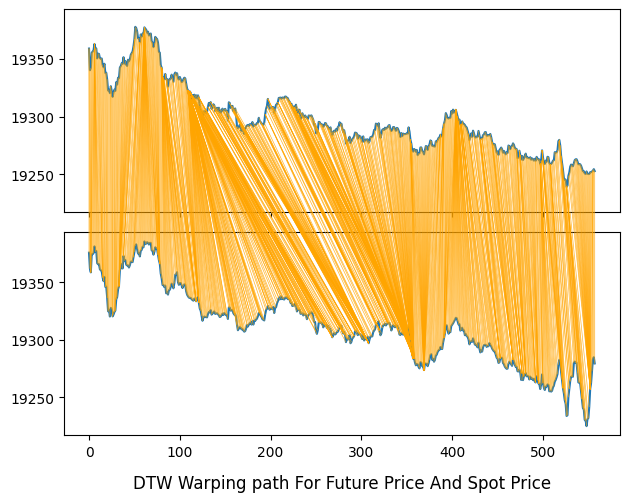

In [48]:
#DTW distance and warping path for Future price  And Spot Price.
df3=data[['price NIFTY23AUGFUT']]
c=df3['price NIFTY23AUGFUT'].values
path1 = dtw.warping_path(a, b)
dtwvis.plot_warping(c, b, path1)
d1= dtw.distance_fast(c, b, use_pruning=True)
plt.title("DTW Warping path For Future Price And Spot Price",y=-0.3)
print(d1)

<Axes: xlabel='time HHMMSS'>

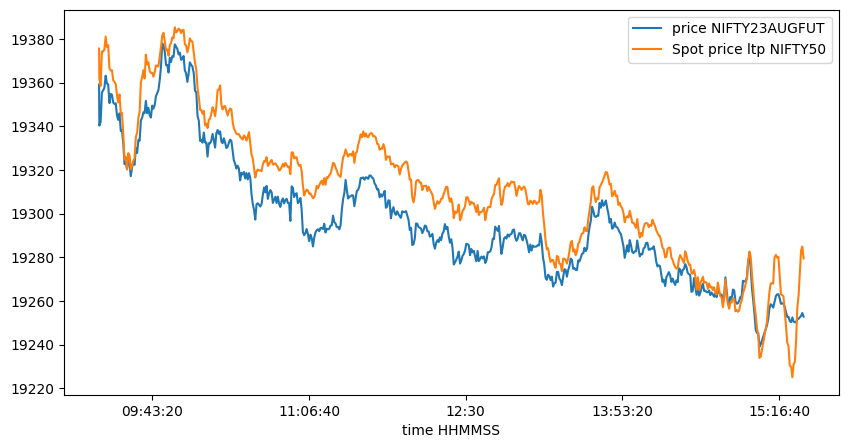

In [50]:
#Graph of Spot pRice and future price
data.loc[:,['price NIFTY23AUGFUT','Spot price ltp NIFTY50']].plot( mark_right=False, figsize = (10,5), grid=False)


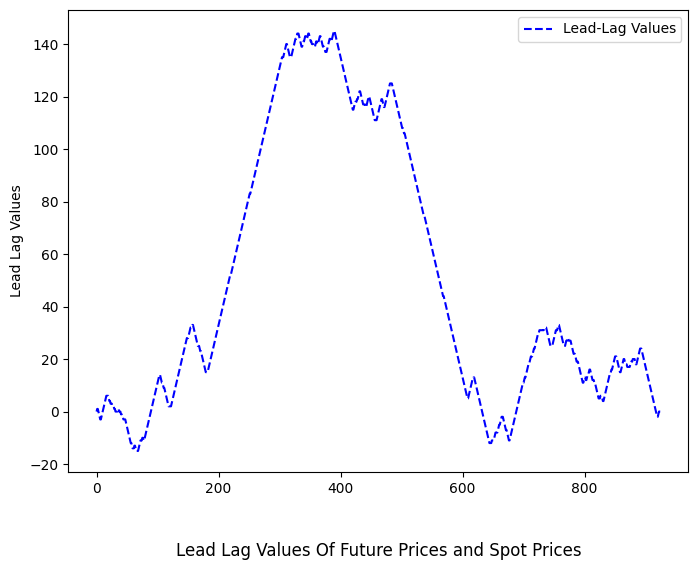

In [55]:
lead_lag_values1= np.array([(point[1] - point[0]) for point in path1])
plt.figure(figsize=(8, 6))
plt.plot(lead_lag_values1,c='blue', label='Lead-Lag Values',linestyle='dashed')
plt.title("Lead Lag Values Of Future Prices and Spot Prices",y=-0.2)
plt.ylabel("Lead Lag Values")
plt.legend(loc='upper right')